In [272]:
import numpy as np
import pandas as pd

import seaborn as sns
import re
import os
import sys

import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams


from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score



In [273]:
df_mental = pd.read_csv('Combined Data.csv')

In [274]:
# verify that the data is correct
print(df_mental.head())


   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [275]:
df_mental.isnull().sum()


Unnamed: 0      0
statement     362
status          0
dtype: int64

In [276]:
df_mental = df_mental.dropna()

In [277]:
df_mental.duplicated().sum()

0

In [278]:
df_mental.shape

(52681, 3)

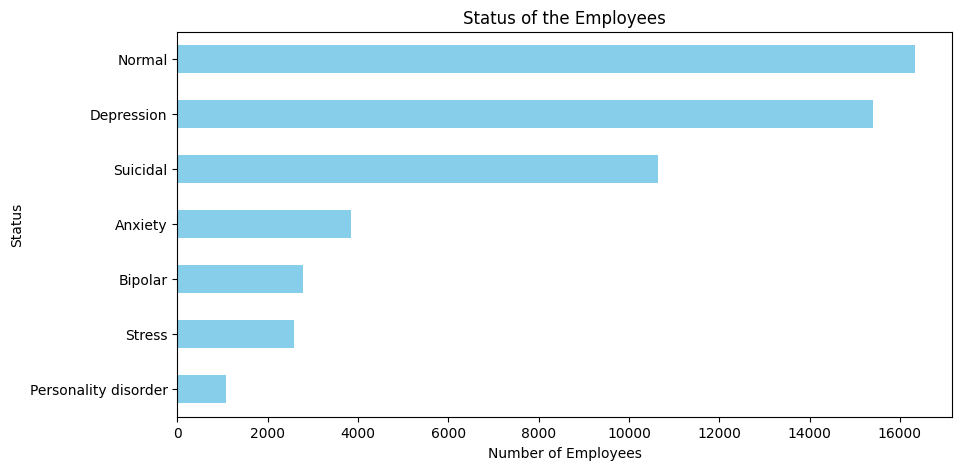

In [279]:
df_mental['status'].value_counts().sort_values().plot(kind='barh', color='skyblue',figsize=(10,5))
plt.title('Status of the Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Status')
plt.show()

In [280]:
df_mental['statement'].head(5)

0                                           oh my gosh
1    trouble sleeping, confused mind, restless hear...
2    All wrong, back off dear, forward doubt. Stay ...
3    I've shifted my focus to something else but I'...
4    I'm restless and restless, it's been a month n...
Name: statement, dtype: object

In [ ]:
# from langdetect import detect
# df_mental_language = df_mental['statement'].sample(2000).apply(lambda x: detect(x))

# df_mental_language.value_counts()


statement
en    1880
af      13
tl      13
fr      11
cy      10
id      10
sw       6
so       6
da       5
cs       5
no       4
it       4
pt       4
fi       4
nl       3
ca       3
de       3
et       3
sv       3
sq       2
pl       2
sk       2
es       1
hu       1
tr       1
hr       1
Name: count, dtype: int64

In [209]:
df_mental['length'] = df_mental['statement'].apply(lambda x: len(x.split()))
# feature for total number of characters in the statement
df_mental['total_length'] = df_mental['statement'].apply(len)
# feature for average word length in the statement
df_mental['average_word_length'] = df_mental['total_length'] / df_mental['length']
# feature for total number of sentences in the statement
df_mental['total_sentences'] = df_mental['statement'].apply(lambda x: len(re.findall('\.', x)))
# feature for total number of words in the statement
df_mental['total_words'] = df_mental['statement'].apply(lambda x: len(re.findall('\s+', x)) + 1)
# feature for total number of unique words in the statement
df_mental['total_unique_words'] = df_mental['statement'].apply(lambda x: len(set(x.split())))
# feature for total number of punctuations in the statement
df_mental['total_punctuations'] = df_mental['statement'].apply(lambda x: len(re.findall('[^\w\s]', x)))


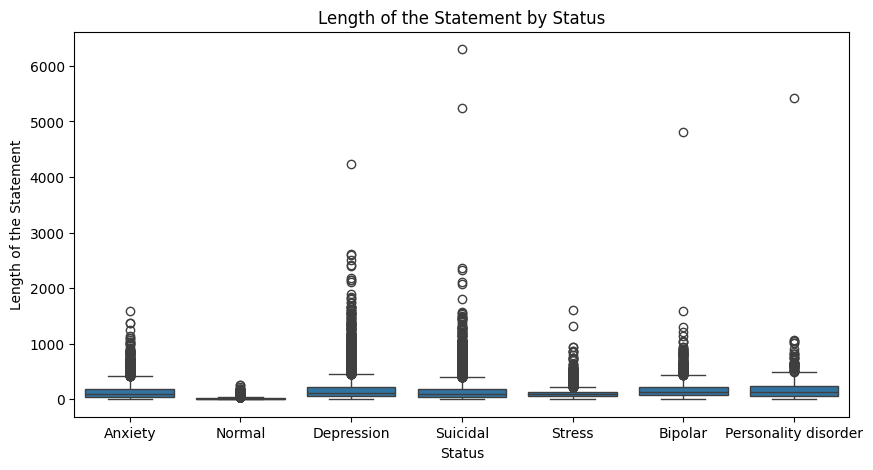

In [210]:
# plot length of the statement by status
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='length', data=df_mental)
plt.title('Length of the Statement by Status')
plt.xlabel('Status')
plt.ylabel('Length of the Statement')
plt.show()

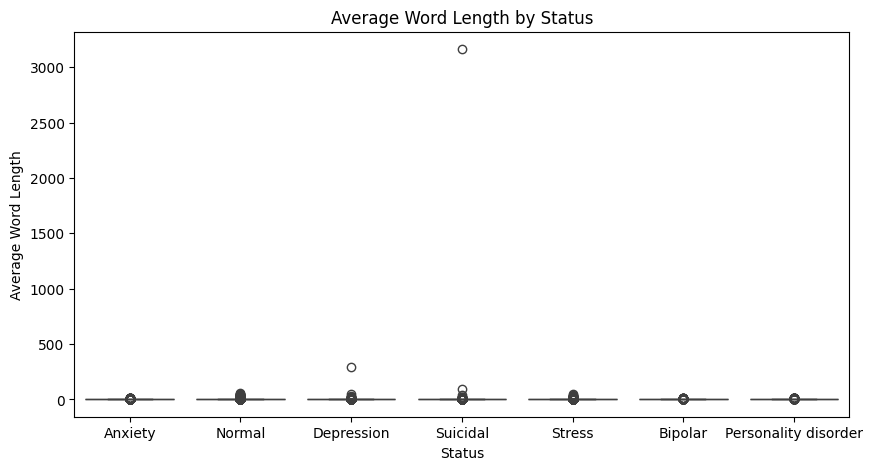

In [211]:
# plot average word length by status
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='average_word_length', data=df_mental)
plt.title('Average Word Length by Status')
plt.xlabel('Status')
plt.ylabel('Average Word Length')
plt.show()

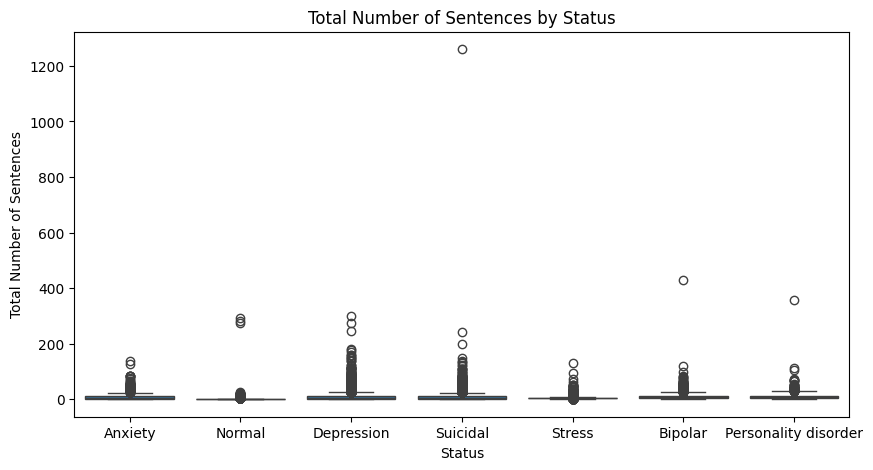

In [212]:
# plot total number of sentences by status
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='total_sentences', data=df_mental)
plt.title('Total Number of Sentences by Status')
plt.xlabel('Status')
plt.ylabel('Total Number of Sentences')
plt.show()

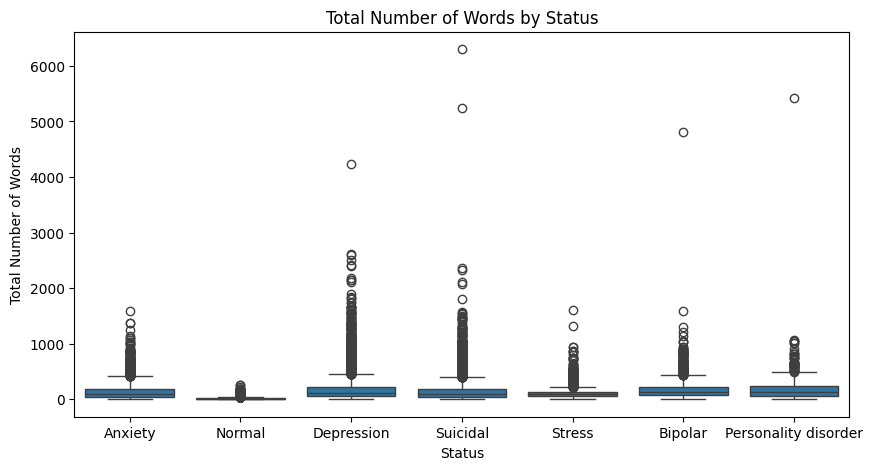

In [213]:
# plot total number of words by status
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='total_words', data=df_mental)
plt.title('Total Number of Words by Status')
plt.xlabel('Status')
plt.ylabel('Total Number of Words')
plt.show()

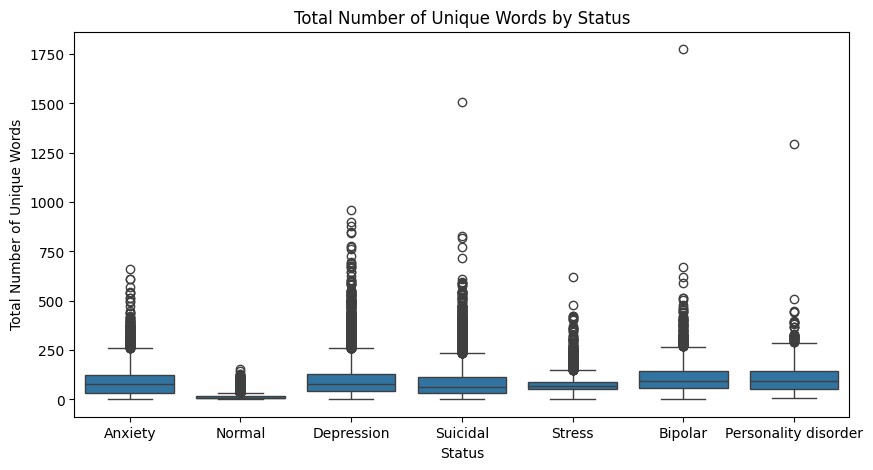

In [214]:
# plot total number of unique words by status
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='total_unique_words', data=df_mental)
plt.title('Total Number of Unique Words by Status')
plt.xlabel('Status')
plt.ylabel('Total Number of Unique Words')
plt.show()

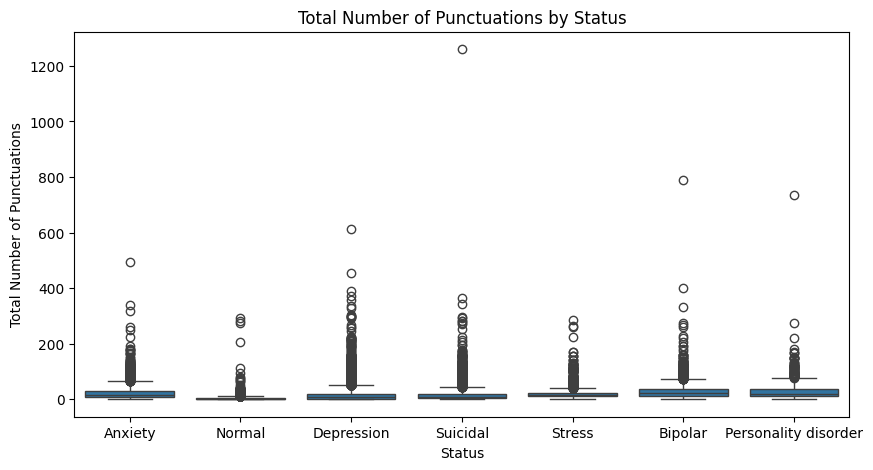

In [215]:
# plot total number of punctuations by status
plt.figure(figsize=(10, 5))
sns.boxplot(x='status', y='total_punctuations', data=df_mental)
plt.title('Total Number of Punctuations by Status')
plt.xlabel('Status')
plt.ylabel('Total Number of Punctuations')
plt.show()

In [216]:
# remove the special characters
df_mental['statement'] = df_mental['statement'].str.replace('[^a-zA-Z]', ' ')
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_mental['statement'] = df_mental['statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [217]:
# convert the text to lowercase
df_mental['statement'] = df_mental['statement'].apply(lambda x: x.lower())
# remove the short words
df_mental['statement'] = df_mental['statement'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
# removing the extra spaces and leading/trailing spaces, and punctuations
df_mental['statement'] = df_mental['statement'].apply(lambda x: re.sub(r'\s+', ' ', x))
df_mental['statement'] = df_mental['statement'].apply(lambda x: x.strip())
df_mental['statement'] = df_mental['statement'].apply(lambda x: re.sub(r'[^\w\s]','',x))

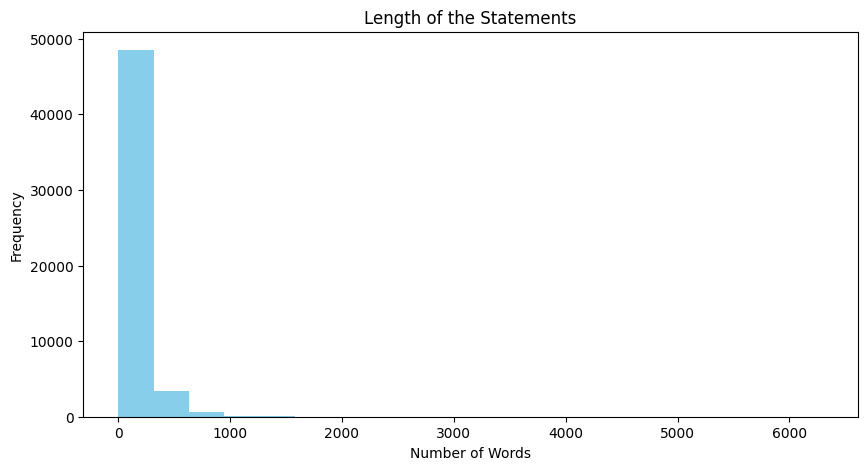

In [218]:
# plot by the number of words
df_mental['length'].plot(kind='hist',bins=20, color='skyblue', figsize=(10,5))
plt.title('Length of the Statements')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [219]:
# truncate the statement to 100 words
df_mental['statement'] = df_mental['statement'].apply(lambda x: ' '.join(x.split()[:50]))

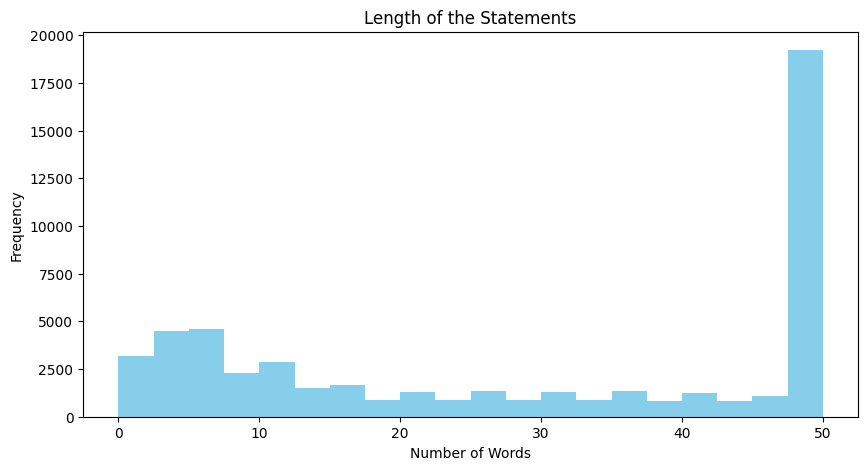

In [220]:
# plot by the number of words
df_mental['length'] = df_mental['statement'].apply(lambda x: len(x.split()))
df_mental['length'].plot(kind='hist',bins=20, color='skyblue', figsize=(10,5))
plt.title('Length of the Statements')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [221]:
index_del = list(df_mental[df_mental['length']<3].index)
df_mental = df_mental.drop(index_del)
df_mental.shape

(49508, 10)

In [222]:
# lemmitization
lemmatizer = WordNetLemmatizer()
df_mental['statement'] = df_mental['statement'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [223]:
# stemming
stemmer = PorterStemmer()
df_mental['statement'] = df_mental['statement'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_mental['statement'].head(5)

1     troubl sleep confus mind restless heart all tune
2    all wrong back dear forward doubt stay restles...
3             ive shift focu someth els im still worri
4         im restless restless month now boy what mean
5       everi break must nervou like someth wrong heck
Name: statement, dtype: object

In [224]:
df_mental

,Unnamed: 0,statement,status,length,total_length,average_word_length,total_sentences,total_words,total_unique_words,total_punctuations
1,1,troubl sleep confus mind restless heart all tune,Anxiety,8,64,6.400000,1,10,10,3
2,2,all wrong back dear forward doubt stay restles...,Anxiety,10,78,5.571429,1,14,13,3
3,3,ive shift focu someth els im still worri,Anxiety,8,61,5.545455,0,11,11,2
4,4,im restless restless month now boy what mean,Anxiety,8,72,5.142857,1,14,14,6
5,5,everi break must nervou like someth wrong heck,Anxiety,8,76,5.428571,0,14,14,3
...,...,...,...,...,...,...,...,...,...,...
53038,53038,nobodi take serious ive 24m dealt depressionan...,Anxiety,50,1766,5.484472,15,322,217,51
53039,53039,selfish feel good like belong world think ever...,Anxiety,50,1012,5.111111,16,198,136,59
53040,53040,way sleep better cant sleep night med help,Anxiety,8,85,5.000000,1,17,16,5
53041,53041,public speak tip hi all give present work next...,Anxiety,43,401,5.418919,3,74,60,17


In [225]:
#df_mental['status'] = df_mental['status'].apply(lambda x: 0 if x=='Normal' else 1)

In [226]:
df_mental['status'].value_counts()

status
Depression              15314
Normal                  13358
Suicidal                10617
Anxiety                  3780
Bipolar                  2777
Stress                   2585
Personality disorder     1077
Name: count, dtype: int64

In [227]:
# count vectorizer
#cv = CountVectorizer(max_features=2000, ngram_range=(1,2))
cv = CountVectorizer(max_features=1000, ngram_range=(1,2))
# tfidf
#cv = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
# convert the text to vectors
df_mental['statement'] = df_mental['statement'].astype(str)
X = cv.fit_transform(df_mental['statement']).toarray()
y = df_mental['status']


/home/wagner/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/wagner/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


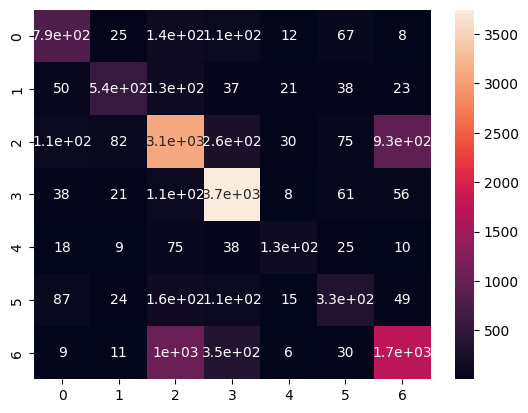

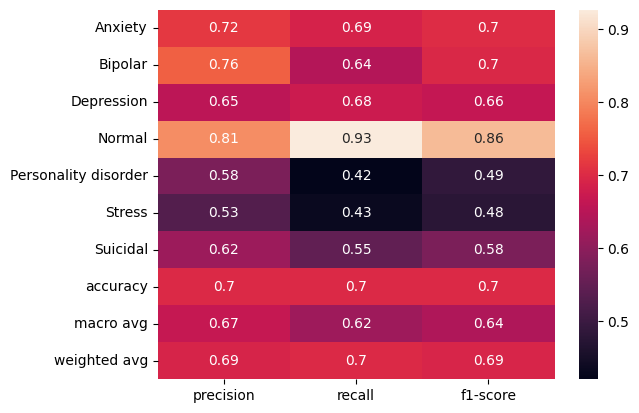

[[ 787   25  137  106   12   67    8]
 [  50  539  128   37   21   38   23]
 [ 111   82 3100  260   30   75  934]
 [  38   21  113 3747    8   61   56]
 [  18    9   75   38  127   25   10]
 [  87   24  155  108   15  334   49]
 [   9   11 1027  347    6   30 1735]]
0.6981081263044503
0.9165703048190408


In [228]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
# feature scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# train the model
#model = MultinomialNB()
# logistic regression
model = LogisticRegression(penalty='l2', C=10.1,l1_ratio=0.5)
# model decision tree
#model = DecisionTreeClassifier()
# xgbost
#model = XGBClassifier(n_estimators=10, learning_rate=0.05)
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_test)
# evaluate the model
cm = confusion_matrix(y_test, y_pred)
# print the confusion matrix as heatmap
sns.heatmap(cm, annot=True)
plt.show()
# do the same for classification report as heatmap
# transform y_test to original labels
#y_test = le.inverse_transform(y_test)
#y_pred = le.inverse_transform(y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)
plt.show()

print(cm)
print(accuracy_score(y_test, y_pred))
# print auc score
#y_pred_proba = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba, multi_class='ovo'))


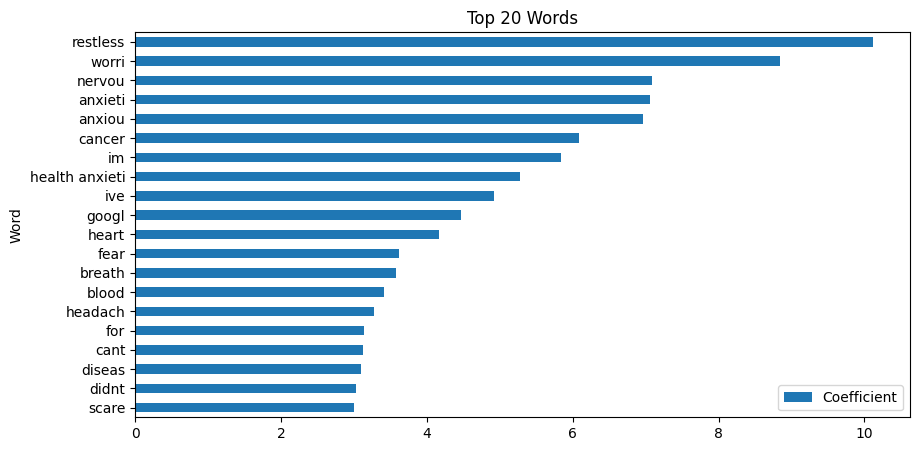

In [229]:
# let us get feature importance
# get the feature names
feature_names = cv.get_feature_names_out()
# get the coefficients
coefficients = model.coef_[0]
# create a dataframe
df = pd.DataFrame({'Word': feature_names, 'Coefficient': coefficients})
# sort the dataframe
df = df.sort_values('Coefficient', ascending=False)
# plot the top 20 words
df.head(20).sort_values(by=['Coefficient']).plot(x='Word', y='Coefficient', kind='barh', figsize=(10,5))
plt.title('Top 20 Words')
plt.show()

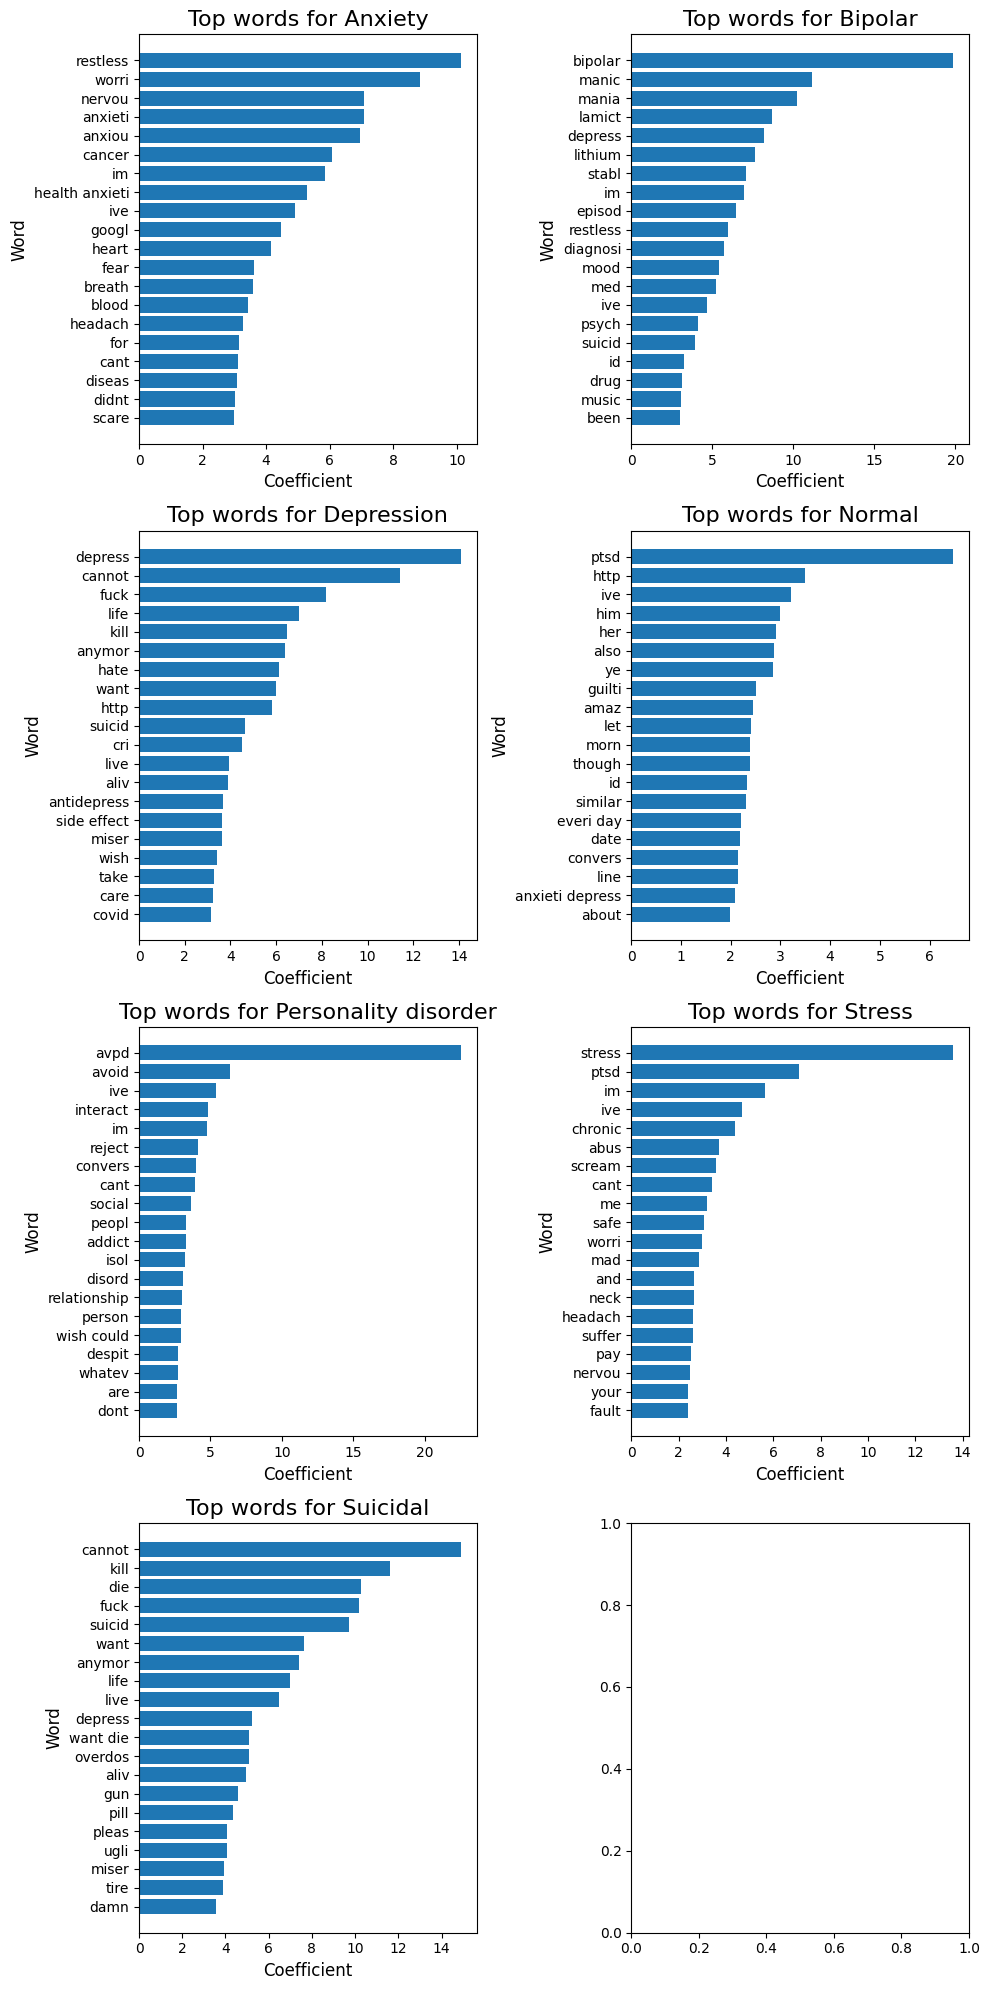

In [230]:
coefficients = model.coef_
num_categories = len(model.classes_)
num_cols = 2
num_rows = (num_categories + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, num_rows * 5))
axes = axes.flatten()

for i, category in enumerate(model.classes_):
    top_features = coefficients[i].argsort()[-20:]
    top_words = [feature_names[j] for j in top_features]
    top_scores = [coefficients[i][j] for j in top_features]
    axes[i].barh(top_words, top_scores)
    axes[i].set_title(f'Top words for {category}', size=16)
    axes[i].set_xlabel('Coefficient',size=12)
    axes[i].set_ylabel('Word',size=12)

plt.tight_layout()
plt.show()

In [231]:
# sentiment analysis
from textblob import TextBlob
df_mental['sentiment'] = df_mental['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_mental['sentiment'].head(5)

1    0.0000
2   -0.2500
3    0.0000
4   -0.3125
5   -0.5000
Name: sentiment, dtype: float64

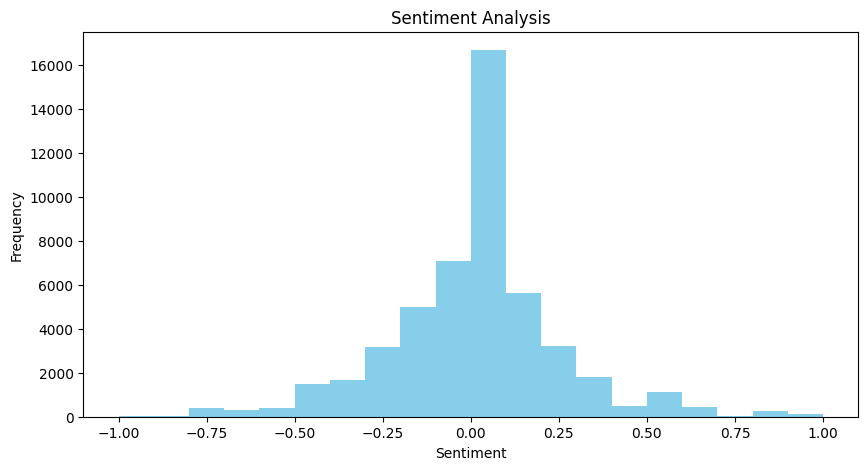

In [232]:
# plot the sentiment
df_mental['sentiment'].plot(kind='hist', bins=20, color='skyblue', figsize=(10,5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

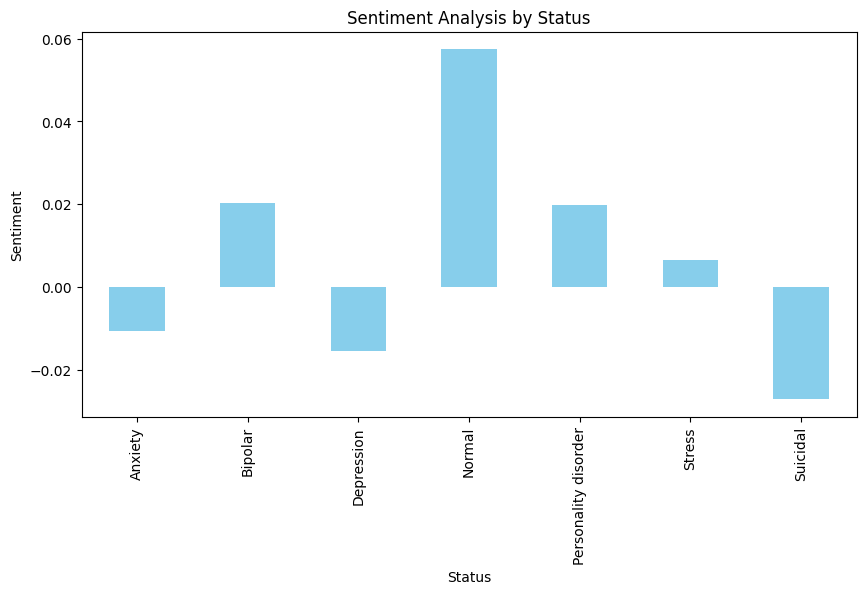

In [233]:
# plot the sentiment by status
df_mental.groupby('status')['sentiment'].mean().plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Sentiment Analysis by Status')
plt.xlabel('Status')
plt.ylabel('Sentiment')
plt.show()

In [234]:
# sentiment as a feature being positive or negative or neutral
df_mental['sentiment_cat'] = df_mental['sentiment'].apply(lambda x: "Positive" if x>0 else("Negative" if x<0 else "Neutral"))
df_mental['sentiment_cat'].value_counts()

sentiment_cat
Positive    20304
Negative    19633
Neutral      9571
Name: count, dtype: int64

In [235]:
# status as a feature being normal or mental
df_mental['status_cat'] = df_mental['status'].apply(lambda x: 0 if x=='Normal' else 1)
df_mental['status_cat'].value_counts()

status_cat
1    36150
0    13358
Name: count, dtype: int64

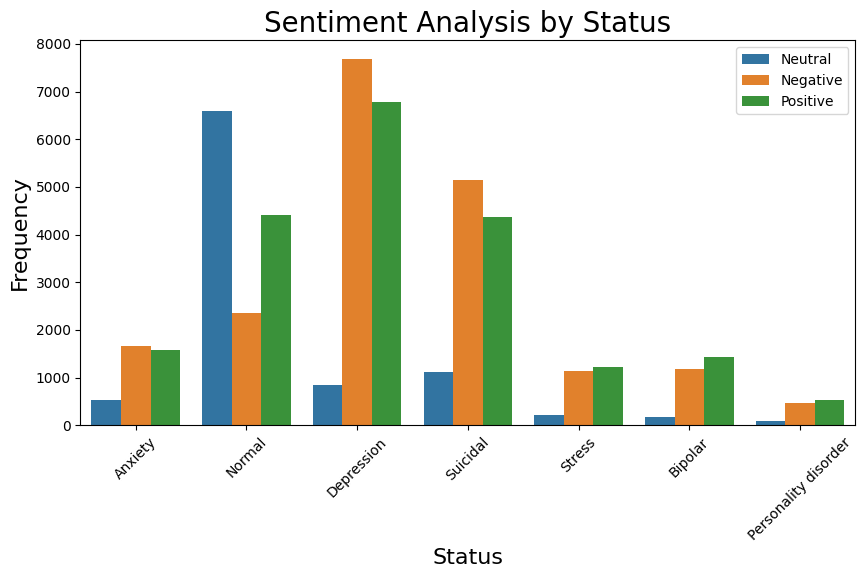

In [236]:
# plot the sentiment by status with seaborn
plt.figure(figsize=(10,5))
sns.countplot(x='status', hue='sentiment_cat', data=df_mental)
plt.title('Sentiment Analysis by Status', size=20)
# legend outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1))
plt.xlabel('Status', size=16)
plt.ylabel('Frequency', size=16)
plt.xticks(rotation=45)
plt.show()


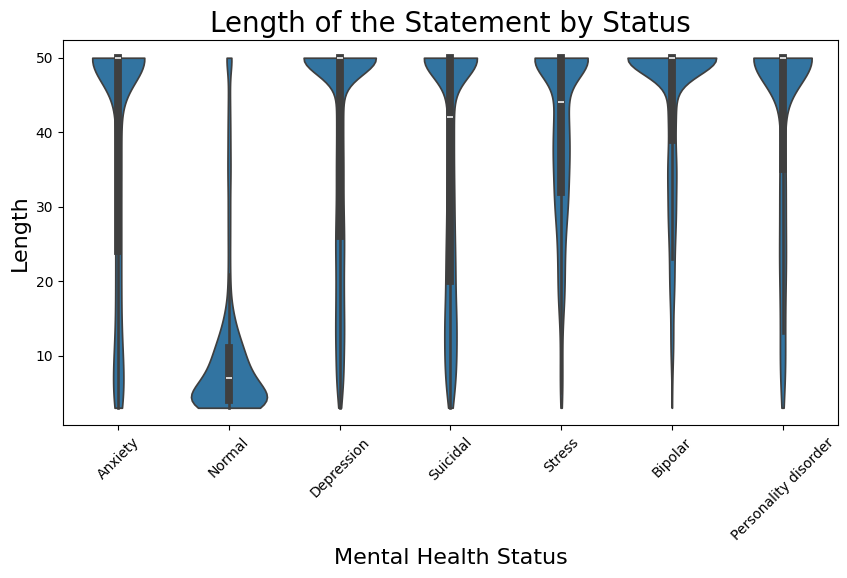

In [243]:
# violinplot of length by status
plt.figure(figsize=(10,5))
sns.violinplot(x='status', y='length', data=df_mental,cut=0)
plt.title('Length of the Statement by Status', size=20)
plt.xlabel('Mental Health Status', size=16)
plt.ylabel('Length', size=16)
plt.xticks(rotation=45)
plt.show()

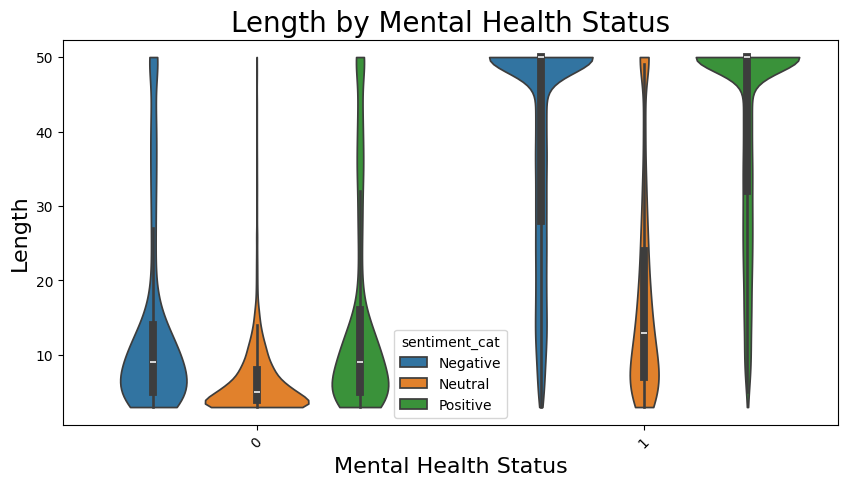

In [244]:
# violinplot of length by sentiment category
plt.figure(figsize=(10,5))
sns.violinplot(hue='sentiment_cat', y='length', x='status_cat',data=df_mental,cut=0)
plt.title('Length by Mental Health Status', size=20)
plt.xlabel('Mental Health Status', size=16)
plt.ylabel('Length', size=16)
plt.xticks(rotation=45)
plt.show()



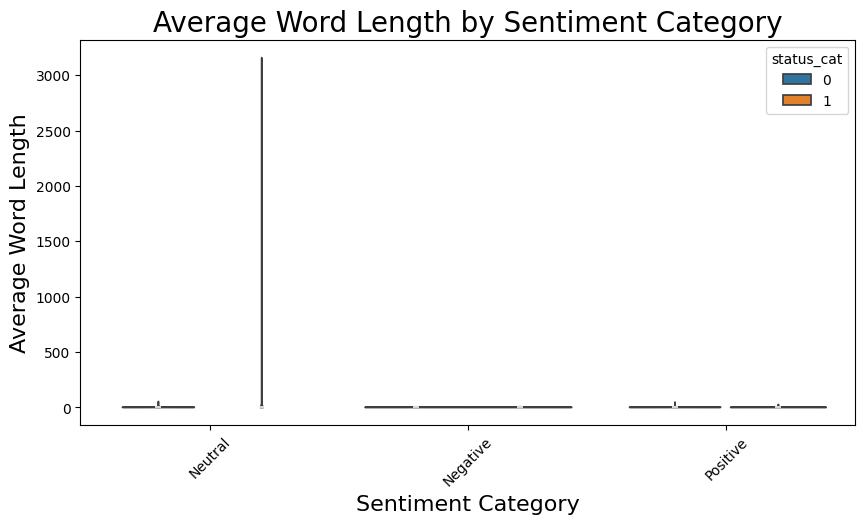

In [245]:
# violinplot of average word length by sentiment category
plt.figure(figsize=(10,5))
sns.violinplot(x='sentiment_cat', y='average_word_length',hue='status_cat', data=df_mental,cut=0)
plt.title('Average Word Length by Sentiment Category', size=20)
plt.xlabel('Sentiment Category', size=16)
plt.ylabel('Average Word Length', size=16)
plt.xticks(rotation=45)
plt.show()


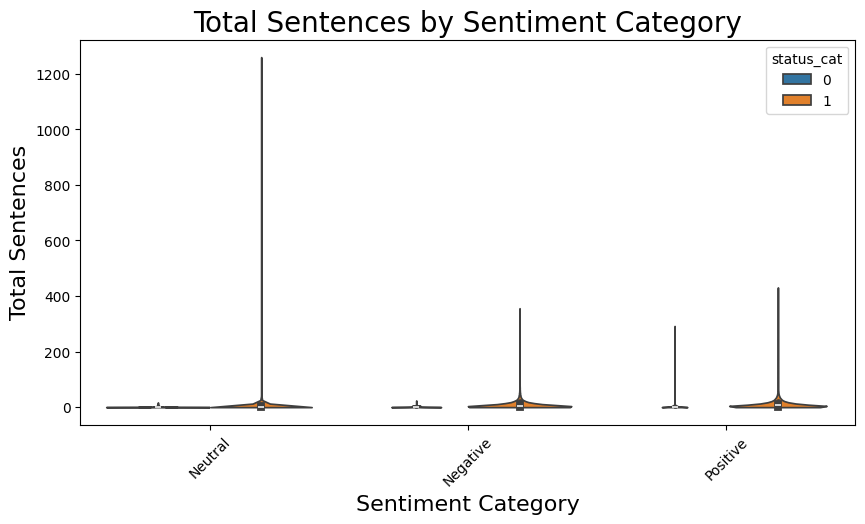

In [246]:
# violinplot of total sentences by sentiment category
plt.figure(figsize=(10,5))
sns.violinplot(x='sentiment_cat', y='total_sentences',hue='status_cat', data=df_mental,cut=0)
plt.title('Total Sentences by Sentiment Category', size=20)
plt.xlabel('Sentiment Category', size=16)
plt.ylabel('Total Sentences', size=16)
plt.xticks(rotation=45)
plt.show()


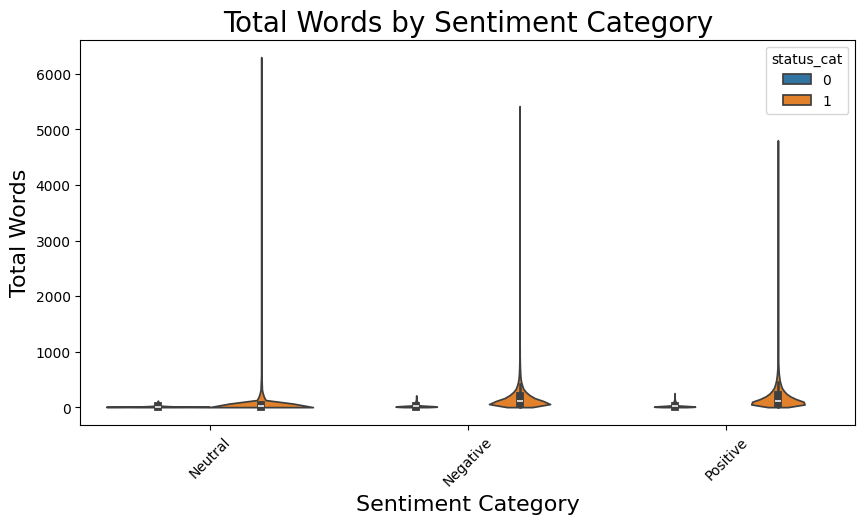

In [247]:
# violinplot of total words by sentiment category
plt.figure(figsize=(10,5))
sns.violinplot(x='sentiment_cat', y='total_words', hue='status_cat',
                data=df_mental,cut=0)
plt.title('Total Words by Sentiment Category', size=20)
plt.xlabel('Sentiment Category', size=16)
plt.ylabel('Total Words', size=16)
plt.xticks(rotation=45)
plt.show()

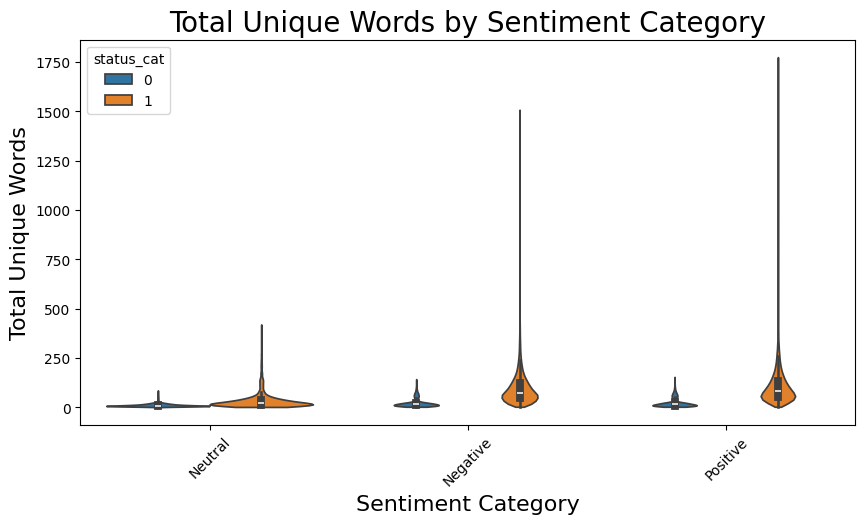

In [248]:
# violinplot of total unique words by sentiment category
plt.figure(figsize=(10,5))
sns.violinplot(x='sentiment_cat', y='total_unique_words', 
               hue='status_cat', data=df_mental,cut=0)
plt.title('Total Unique Words by Sentiment Category', size=20)
plt.xlabel('Sentiment Category', size=16)
plt.ylabel('Total Unique Words', size=16)
plt.xticks(rotation=45)
plt.show()

In [250]:
# inserting the sentiment as a feature in the model

# count vectorizer
#cv = CountVectorizer(max_features=2000, ngram_range=(1,2))
cv = CountVectorizer(max_features=1000, ngram_range=(1,2))
# tfidf
#cv = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
# convert the text to vectors
df_mental['statement'] = df_mental['statement'].astype(str)
df_mental['sentiment_cat'] = df_mental['sentiment_cat'].astype(str)
# combine the statement and sentiment
df_mental['statement'] = df_mental['statement'] + ' ' + df_mental['sentiment_cat']
X = cv.fit_transform(df_mental['statement']).toarray()
y = df_mental['status']


/home/wagner/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/wagner/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


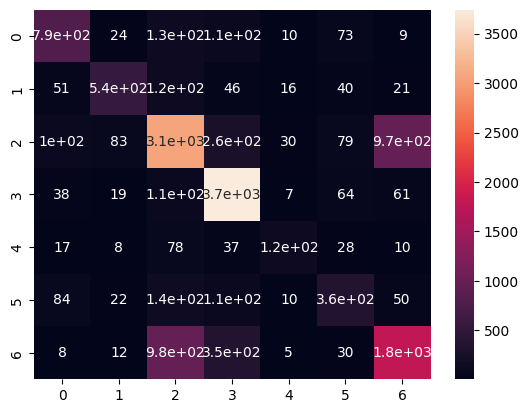

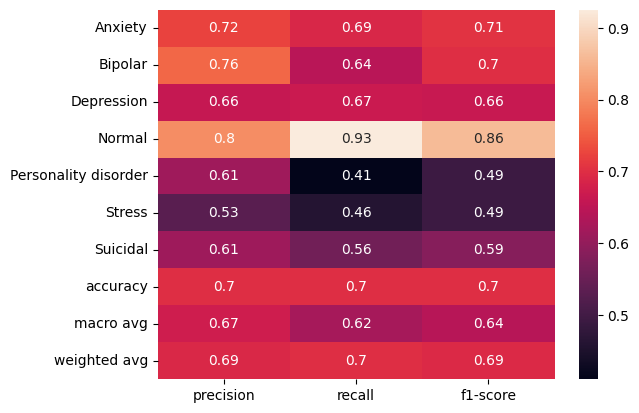

[[ 786   24  132  108   10   73    9]
 [  51  539  123   46   16   40   21]
 [ 103   83 3060  264   30   79  973]
 [  38   19  113 3742    7   64   61]
 [  17    8   78   37  124   28   10]
 [  84   22  144  107   10  355   50]
 [   8   12  982  353    5   30 1775]]
0.6989160438968558
0.9169330523657228


In [251]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)
# feature scaling
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# train the model
#model = MultinomialNB()
# logistic regression
model = LogisticRegression(penalty='l2', C=10.1,l1_ratio=0.5)
# model decision tree
#model = DecisionTreeClassifier()
# xgbost
#model = XGBClassifier(n_estimators=10, learning_rate=0.05)
model.fit(X_train, y_train)
# predict the model
y_pred = model.predict(X_test)
# evaluate the model
cm = confusion_matrix(y_test, y_pred)
# print the confusion matrix as heatmap
sns.heatmap(cm, annot=True)
plt.show()
# do the same for classification report as heatmap
# transform y_test to original labels
#y_test = le.inverse_transform(y_test)
#y_pred = le.inverse_transform(y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True)
plt.show()

print(cm)
print(accuracy_score(y_test, y_pred))
# print auc score
#y_pred_proba = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba, multi_class='ovo'))


In [271]:
# how to install langdetect
#!pip install langdetect


In [268]:
#df_mental['statement']
# detect the languages in the statement
# from langdetect import detect
# df_mental_language = df_mental['statement'].sample(400).apply(lambda x: detect(x))

# df_mental_language.value_counts()


In [269]:
df_mental.shape

(49508, 13)

In [270]:
# select only the english language
# df_mental = df_mental[df_mental['statement'].apply(lambda x: detect(x)=='en')]